In [1]:
# 1.1 广义线性模型
# 1.1.1最小二乘法
from sklearn import linear_model

In [2]:
clf  = linear_model.LinearRegression()

In [3]:
clf.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
clf.coef_  # 求解y= ax+b中的a,b

array([ 0.5,  0.5])

In [ ]:
# example 

In [5]:
import matplotlib.pyplot as plt  # 导入作图的库
import numpy as np
from sklearn import datasets

In [6]:
diabetes = datasets.load_diabetes()

In [14]:
# diabetes

In [8]:
diabetes_x = diabetes.data[:, np.newaxis, 2]

In [9]:
diabetes_x_train = diabetes_x[:-20]
diabetes_x_test = diabetes_x[-20:]

In [10]:
regr = linear_model.LinearRegression()

In [11]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [12]:
regr.fit(diabetes_x_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('coefficients:\n',regr.coef_)  # 相关度

coefficients:
 [ 938.23786125]


In [15]:
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_x_test) - diabetes_y_test) ** 2))

Residual sum of squares: 2548.07


In [16]:
print('Variance score: %.2f' % regr.score(diabetes_x_test, diabetes_y_test))

Variance score: 0.47


In [31]:
plt.scatter(diabetes_x_test, diabetes_y_test,  color='black')

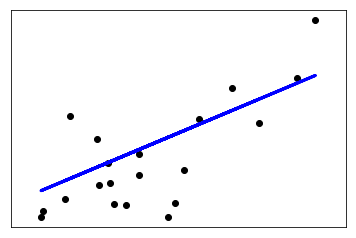

In [32]:
plt.plot(diabetes_x_test, regr.predict(diabetes_x_test), color='blue',
         linewidth=3)
plt.xticks(())
plt.yticks(())
plt.savefig('regress.png')
plt.show()

In [ ]:
#  1.1.2岭回归通过对回归稀疏增加罚项来解决 普通最小二乘法 的一些问题.岭回归系数通过最小化带罚项的残差平方和

In [19]:
from sklearn import linear_model

In [20]:
clf = linear_model.Ridge(alpha=0.5)

In [22]:
clf.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
clf.coef_

array([ 0.34545455,  0.34545455])

In [24]:
clf.intercept_

0.13636363636363641

In [ ]:
# example

In [33]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Automatically created module for IPython interactive environment


In [34]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

In [35]:
y = np.ones(10)

In [36]:
n_alphas = 200

In [37]:
alphas = np.logspace(-10, -2, n_alphas)

In [38]:
clf = linear_model.Ridge(fit_intercept=False)

In [39]:
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

D:\python3.4\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


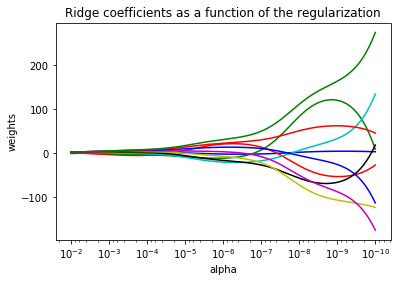

In [42]:
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.savefig('ridge.png')
plt.show()

In [ ]:
# 1.1.3 Lasso

In [43]:
from sklearn import linear_model

In [44]:
clf = linear_model.Lasso(alpha=0.1)

In [45]:
clf.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
clf.predict([[1, 1]])

array([ 0.8])

In [ ]:
# example Lasso

In [47]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Automatically created module for IPython interactive environment


In [48]:
np.random.seed(42)

In [49]:
n_samples, n_features = 50, 200

In [50]:
X = np.random.randn(n_samples, n_features)

In [51]:
coef = 3 * np.random.randn(n_features)

In [52]:
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

D:\python3.4\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\python3.4\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [53]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.384710


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240176


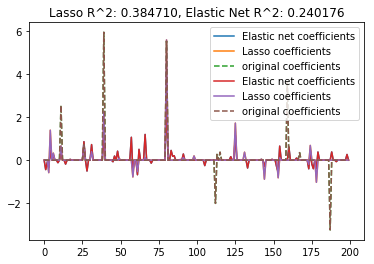

In [56]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, label='Elastic net coefficients')
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.savefig('lasso.pdf')
plt.show()